### Sum sin functions over a range of frequencies

[  0.00000000e+00   3.92699082e-03   7.85398163e-03 ...,   1.57001093e+01
   1.57040363e+01   1.57079633e+01]


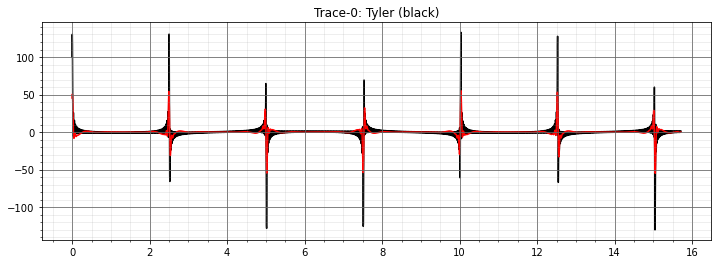

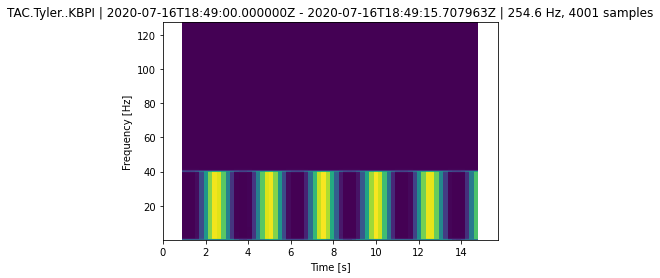

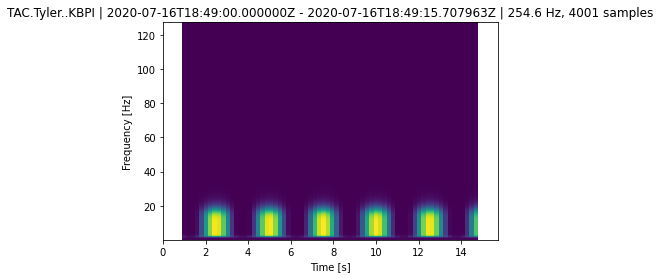

In [46]:
import numpy as np
import matplotlib.pyplot as plt

import obspy
from obspy import Stream
from obspy import Trace
from obspy import UTCDateTime

#time pars
t0 = 0
t1 = 5*np.pi
nt = 4001

#frequency pars
nf = 100
f1 = 0.5
f2 = 40
wf1 = 2
wf2 = 18

#data arrays
t = np.linspace(t0,t1,nt,endpoint=True)
print(t)
d = np.zeros_like(t)

#sum frequency range
freqs = np.linspace(f1,f2,nf,endpoint=True)
for f in freqs:
    d += np.sin(2*np.pi*f*t)
    d += np.cos(2*np.pi*f*t)
    
#make obspy Stream(Trace())
stats = {'network': 'TAC', 'station': 'Tyler', 'location': '', 
        'channel': 'KBPI', 'npts': len(d), 'delta': t[1]-t[0]}
stats['starttime'] = UTCDateTime(2020, 7, 16, 18, 49, 0, 0)
st = Stream([Trace(data=d, header=stats)])
cst = st.copy()
cst.filter('bandpass',freqmin=wf1,freqmax=wf2,corners=4,zerophase=True)
#cst.filter('bandpass',freqmin=wf1,freqmax=wf2)

#plot Stream(Trace())
fig, ax = plt.subplots(1,figsize=(12,4))
                       
#ax.plot(t,d,c='black')
pcolors = ['black','red']
ax.plot(st[0].times(),st[0].data,c=pcolors[0],zorder=0)
ax.plot(cst[0].times(),cst[0].data,c=pcolors[1],zorder=1)

station = st[0].stats.station
ptitle = 'Trace-0: %s (%s)' %(str(station),pcolors[0])
ax.set_title(ptitle)

ax.grid(b=True, which='major', color='#666666', linestyle='-')
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
                       
plt.show()

st[0].spectrogram()
cst[0].spectrogram()


